# Introduction

In this lab, we will demonstrate how to use Stochastic Gradient Descent (SGD) to approximate the solution of a One-Class SVM in the case of an RBF kernel.

We will compare the results of this approximation to the results of using a One-Class SVM with a kernelized approach. The purpose of this lab is not to show the benefits of approximation in terms of computation time, but rather to demonstrate that similar results can be obtained using SGD on a toy dataset.

# Import Libraries

We start by importing the necessary libraries for this lab: NumPy, Matplotlib, and scikit-learn.

In [10]:
import matplotlib
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import numpy as np

from sklearn.kernel_approximation import Nystroem
from sklearn.linear_model import SGDOneClassSVM
from sklearn.pipeline import make_pipeline
from sklearn.svm import OneClassSVM

font = {"weight": "normal", "size": 15}

# Generate Data

We will generate a toy dataset for this lab. We will generate 500 training samples and 20 test samples. We will also generate 20 abnormal samples.

In [11]:
random_state = 42
rng = np.random.RandomState(random_state)

# Generate train data
X = 0.3 * rng.randn(500, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * rng.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

# Fit One-Class SVM

We will first fit a One-Class SVM with an RBF kernel to our dataset.

In [12]:
# Fit the One-Class SVM
clf = OneClassSVM(gamma=gamma, kernel="rbf", nu=nu)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

# Fit the One-Class SVM using a kernel approximation and SGD
transform = Nystroem(gamma=gamma, random_state=random_state)
clf_sgd = SGDOneClassSVM(
    nu=nu, shuffle=True, fit_intercept=True, random_state=random_state, tol=1e-4
)
pipe_sgd = make_pipeline(transform, clf_sgd)
pipe_sgd.fit(X_train)
y_pred_train_sgd = pipe_sgd.predict(X_train)
y_pred_test_sgd = pipe_sgd.predict(X_test)
y_pred_outliers_sgd = pipe_sgd.predict(X_outliers)
n_error_train_sgd = y_pred_train_sgd[y_pred_train_sgd == -1].size
n_error_test_sgd = y_pred_test_sgd[y_pred_test_sgd == -1].size
n_error_outliers_sgd = y_pred_outliers_sgd[y_pred_outliers_sgd == 1].size

# Plot Results

Finally, we will plot the results of our One-Class SVM and our One-Class SVM using SGD.

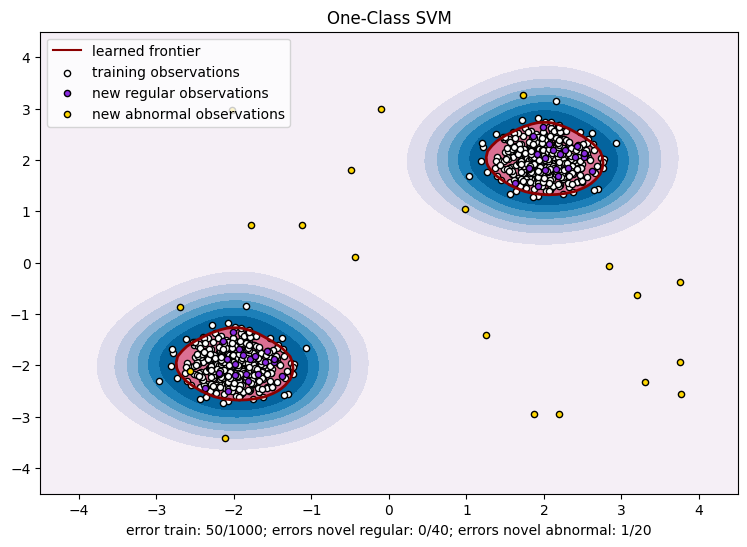

In [13]:
from sklearn.inspection import DecisionBoundaryDisplay

_, ax = plt.subplots(figsize=(9, 6))

xx, yy = np.meshgrid(np.linspace(-4.5, 4.5, 50), np.linspace(-4.5, 4.5, 50))
X = np.concatenate([xx.ravel().reshape(-1, 1), yy.ravel().reshape(-1, 1)], axis=1)
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    response_method="decision_function",
    plot_method="contourf",
    ax=ax,
    cmap="PuBu",
)
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    response_method="decision_function",
    plot_method="contour",
    ax=ax,
    linewidths=2,
    colors="darkred",
    levels=[0],
)
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    response_method="decision_function",
    plot_method="contourf",
    ax=ax,
    colors="palevioletred",
    levels=[0, clf.decision_function(X).max()],
)

s = 20
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c="white", s=s, edgecolors="k")
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c="blueviolet", s=s, edgecolors="k")
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c="gold", s=s, edgecolors="k")

ax.set(
    title="One-Class SVM",
    xlim=(-4.5, 4.5),
    ylim=(-4.5, 4.5),
    xlabel=(
        f"error train: {n_error_train}/{X_train.shape[0]}; "
        f"errors novel regular: {n_error_test}/{X_test.shape[0]}; "
        f"errors novel abnormal: {n_error_outliers}/{X_outliers.shape[0]}"
    ),
)
_ = ax.legend(
    [mlines.Line2D([], [], color="darkred", label="learned frontier"), b1, b2, c],
    [
        "learned frontier",
        "training observations",
        "new regular observations",
        "new abnormal observations",
    ],
    loc="upper left",
)

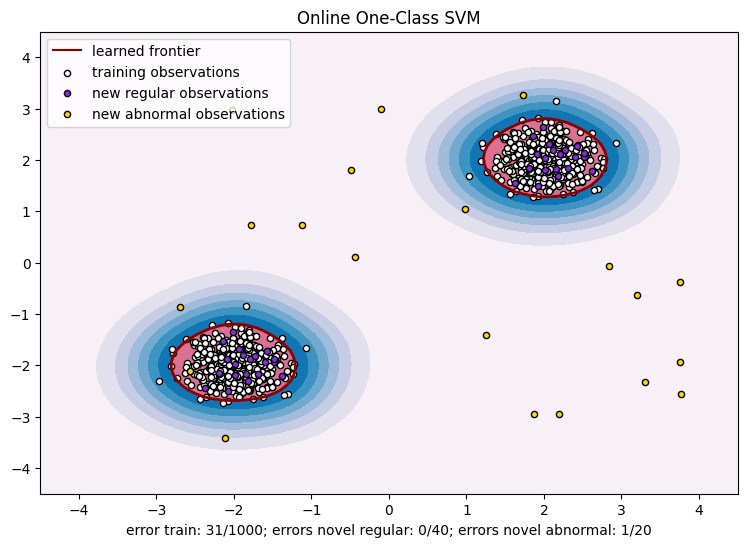

In [14]:
_, ax = plt.subplots(figsize=(9, 6))

xx, yy = np.meshgrid(np.linspace(-4.5, 4.5, 50), np.linspace(-4.5, 4.5, 50))
X = np.concatenate([xx.ravel().reshape(-1, 1), yy.ravel().reshape(-1, 1)], axis=1)
DecisionBoundaryDisplay.from_estimator(
    pipe_sgd,
    X,
    response_method="decision_function",
    plot_method="contourf",
    ax=ax,
    cmap="PuBu",
)
DecisionBoundaryDisplay.from_estimator(
    pipe_sgd,
    X,
    response_method="decision_function",
    plot_method="contour",
    ax=ax,
    linewidths=2,
    colors="darkred",
    levels=[0],
)
DecisionBoundaryDisplay.from_estimator(
    pipe_sgd,
    X,
    response_method="decision_function",
    plot_method="contourf",
    ax=ax,
    colors="palevioletred",
    levels=[0, pipe_sgd.decision_function(X).max()],
)

s = 20
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c="white", s=s, edgecolors="k")
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c="blueviolet", s=s, edgecolors="k")
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c="gold", s=s, edgecolors="k")

ax.set(
    title="Online One-Class SVM",
    xlim=(-4.5, 4.5),
    ylim=(-4.5, 4.5),
    xlabel=(
        f"error train: {n_error_train_sgd}/{X_train.shape[0]}; "
        f"errors novel regular: {n_error_test_sgd}/{X_test.shape[0]}; "
        f"errors novel abnormal: {n_error_outliers_sgd}/{X_outliers.shape[0]}"
    ),
)
ax.legend(
    [mlines.Line2D([], [], color="darkred", label="learned frontier"), b1, b2, c],
    [
        "learned frontier",
        "training observations",
        "new regular observations",
        "new abnormal observations",
    ],
    loc="upper left",
)
plt.show()

# Summary

In this lab, we demonstrated how to use Stochastic Gradient Descent (SGD) to approximate the solution of a One-Class SVM with an RBF kernel. We compared the results of this approximation to the results of using a One-Class SVM with a kernelized approach. We generated a toy dataset and plotted the results of our models.